## Convert the Polish Companies Data from arff file into csv file

In [ ]:
!pip install liac-arff
!pip install xgboost
!pip install lightgbm
!pip install imblearn==0.10.1

In [1]:
import arff
import csv

path = r"5year.arff"


# Load ARFF file
with open(path) as arff_file:
    data = arff.load(arff_file)

# Write to CSV file
with open("data_polish5.csv", 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    # Write header
    writer.writerow(data['attributes'])
    # Write data
    writer.writerows(data['data'])

## Read both data sets and combine them according to the list of shared features

In [2]:
import pandas as pd
feature_taiwan = [1,2,37,38,45,46,47,48,49,50,54,56,57,68,80,89,95,0]
feature_polish = [1,7,2 ,10,36,61,43,60,64,4 ,3 ,50,5 ,6 ,48,19,8,0]
# Load the CSV file
df_taiwaneses = pd.read_csv('data_taiwanese.csv')
tai_arry = df_taiwaneses.columns[feature_taiwan]
df_taiwaneses = df_taiwaneses[tai_arry]

df_polish = pd.read_csv("data_polish5.csv")
# Move the last column to the first position                         
cols = df_polish.columns.tolist()
cols = [cols[-1]] + cols[:-1]
df_polish = df_polish[cols]
polish_arry = df_polish.columns[feature_polish]
df_polish= df_polish[polish_arry]
df_polish.columns = tai_arry

df_final = pd.concat([df_taiwaneses,df_polish], ignore_index=True)

In [3]:
print(df_final['Bankrupt?'].value_counts())

Bankrupt?
0    12099
1      630
Name: count, dtype: int64


In [4]:
dirty_data = df_final.copy()
dirty_data.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Debt ratio %,Net worth/Assets,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Working Capital to Total Assets,Current Assets/Total Assets,Cash/Total Assets,Retained Earnings to Total Assets,Cash Flow to Total Assets,Gross Profit to Sales,Equity to Liability,Bankrupt?
0,0.370594,0.424389,0.207576,0.792424,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.672775,0.190643,0.004094,0.903225,0.637555,0.601453,0.016469,1
1,0.464291,0.538214,0.171176,0.828824,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.751111,0.182419,0.014948,0.931065,0.641100,0.610237,0.020794,1
2,0.426071,0.499019,0.207516,0.792484,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.829502,0.602806,0.000991,0.909903,0.642765,0.601449,0.016474,1
3,0.399844,0.451265,0.151465,0.848535,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.028065,0.725754,0.225815,0.018851,0.906902,0.579039,0.583538,0.023982,1
4,0.465022,0.538432,0.106509,0.893491,0.175412,0.001449,0.004367,1.633674e-04,2.935211e-04,0.040161,0.751822,0.358380,0.014161,0.913850,0.622374,0.598782,0.035490,1


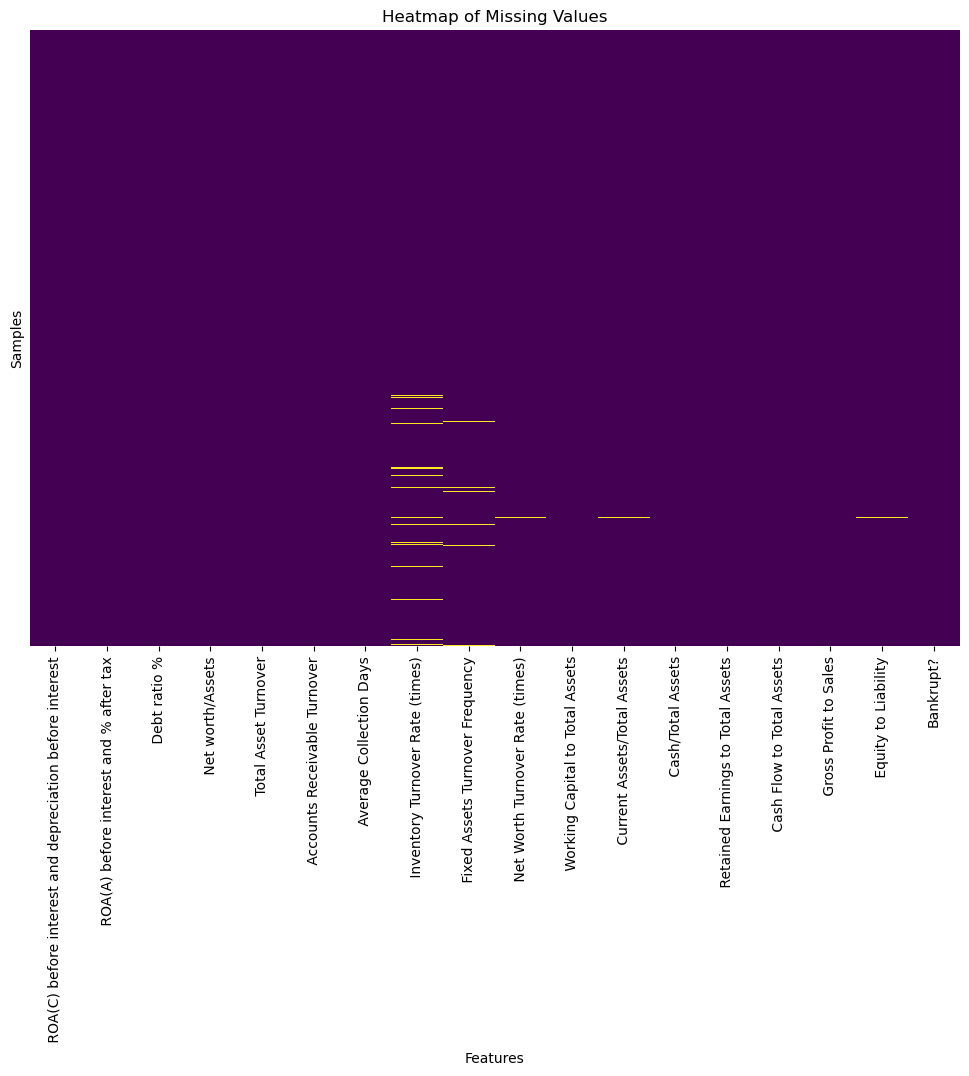

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(dirty_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

In [6]:
# Count NA values in each column
na_counts = dirty_data.isna().sum()

print("Number of NA values in each column:")
print(na_counts)

Number of NA values in each column:
 ROA(C) before interest and depreciation before interest      3
 ROA(A) before interest and % after tax                       3
 Debt ratio %                                                 3
 Net worth/Assets                                             3
 Total Asset Turnover                                         3
 Accounts Receivable Turnover                                15
 Average Collection Days                                      0
 Inventory Turnover Rate (times)                            268
 Fixed Assets Turnover Frequency                            107
 Net Worth Turnover Rate (times)                             21
 Working Capital to Total Assets                              3
 Current Assets/Total Assets                                 18
 Cash/Total Assets                                           11
 Retained Earnings to Total Assets                            3
 Cash Flow to Total Assets                                    3
 Gro

## Fill the Missing values using KNN Imputaion

In [7]:
from sklearn.impute import KNNImputer

# KNN Imputaion
knn_imputer = KNNImputer(n_neighbors=5)
dirty_data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(dirty_data), columns=dirty_data.columns)

In [8]:
# Count NA values in each column
na_counts = dirty_data_knn_imputed.isna().sum()

print("Number of NA values in each column:")
print(na_counts)

Number of NA values in each column:
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 Debt ratio %                                               0
 Net worth/Assets                                           0
 Total Asset Turnover                                       0
 Accounts Receivable Turnover                               0
 Average Collection Days                                    0
 Inventory Turnover Rate (times)                            0
 Fixed Assets Turnover Frequency                            0
 Net Worth Turnover Rate (times)                            0
 Working Capital to Total Assets                            0
 Current Assets/Total Assets                                0
 Cash/Total Assets                                          0
 Retained Earnings to Total Assets                          0
 Cash Flow to Total Assets                                  0
 Gross Profit to Sales            

## Outliers Detections

In [9]:
from sklearn.ensemble import IsolationForest

# Load the cleaned data
cleaned_data = dirty_data_knn_imputed.copy()


# Separate the data into two subsets
data_non_bankrupt = cleaned_data[cleaned_data["Bankrupt?"] == 0]
data_bankrupt = cleaned_data[cleaned_data["Bankrupt?"] == 1]

# Drop the "Bankrupt?" column from the non-bankrupt data for training the Isolation Forest model
X_non_bankrupt = data_non_bankrupt.drop(columns=["Bankrupt?"])

# Train the Isolation Forest model
isf = IsolationForest(contamination=0.04, random_state=42)
isf.fit(X_non_bankrupt)

# Predict outliers
predictions = isf.predict(X_non_bankrupt)

# Filter out the outliers
data_non_bankrupt_filtered = data_non_bankrupt[predictions == 1]

# Drop the "Bankrupt?" column from the bankrupt data for training the Isolation Forest model
X_bankrupt = data_bankrupt.drop(columns=["Bankrupt?"])

# Train the Isolation Forest model
isf = IsolationForest(contamination=0.02, random_state=42)
isf.fit(X_bankrupt)

# Predict outliers
predictions = isf.predict(X_bankrupt)

# Filter out the outliers
data_bankrupt_filtered = data_bankrupt[predictions == 1]



# Combine the filtered non-bankrupt data with the bankrupt data
cleaned_data_outliers_removed = pd.concat([data_non_bankrupt_filtered, data_bankrupt_filtered])

# Reset the index of the final dataset
cleaned_data_outliers_removed.reset_index(drop=True, inplace=True)

cleaned_data_outliers_removed.describe()

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Debt ratio %,Net worth/Assets,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Working Capital to Total Assets,Current Assets/Total Assets,Cash/Total Assets,Retained Earnings to Total Assets,Cash Flow to Total Assets,Gross Profit to Sales,Equity to Liability,Bankrupt?
count,12232.000000,12232.000000,12232.000000,12232.000000,12232.000000,1.223200e+04,1.223200e+04,1.223200e+04,1.223200e+04,12232.000000,12232.000000,12232.000000,1.223200e+04,12232.000000,12232.000000,12232.000000,12232.000000,12232.000000
mean,0.305709,0.340959,0.281245,0.709054,0.872031,3.797993e+06,3.033414e+06,1.209812e+09,5.633512e+08,1.085365,0.545864,1.125532,9.391905e+00,0.554653,0.369168,0.352477,0.988267,0.050441
std,0.252179,0.273797,0.293106,0.300500,1.081635,1.568064e+08,1.283484e+08,2.664994e+09,1.920985e+09,2.964380,0.376810,1.496961,1.493962e+04,2.469027,0.352595,0.517612,3.487952,0.218863
min,-5.112000,-5.112000,0.000000,-5.837600,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.403110,-6.184100,0.000000,-1.076400e+06,-100.380000,-5.431900,-36.219000,-0.866960,0.000000
25%,0.062499,0.073529,0.100304,0.564537,0.109445,9.110000e-04,6.132774e-03,4.187843e-04,4.750806e-04,0.028065,0.256025,0.447207,7.923301e-03,0.000000,0.036644,0.047060,0.030218,0.000000
50%,0.446010,0.495939,0.160912,0.836215,0.247376,2.430686e-03,1.169770e-02,7.677850e+00,1.217300e+00,0.064355,0.751462,0.699115,7.470977e-02,0.917792,0.610300,0.596599,0.072245,0.000000
75%,0.508214,0.564871,0.410820,0.898494,1.460100,5.713675e+00,9.936900e+01,2.617332e+02,6.378225e+00,1.476000,0.818805,1.150475,4.012366e-01,0.939116,0.647436,0.607342,0.938943,0.000000
max,2.352300,2.352300,6.837600,1.000000,12.117000,9.740000e+09,7.940000e+09,9.990000e+09,9.990000e+09,243.550000,1.000000,56.098000,1.250100e+06,203.150000,2.218800,18.075000,298.970000,1.000000


In [10]:
print(cleaned_data_outliers_removed['Bankrupt?'].value_counts())

Bankrupt?
0.0    11615
1.0      617
Name: count, dtype: int64


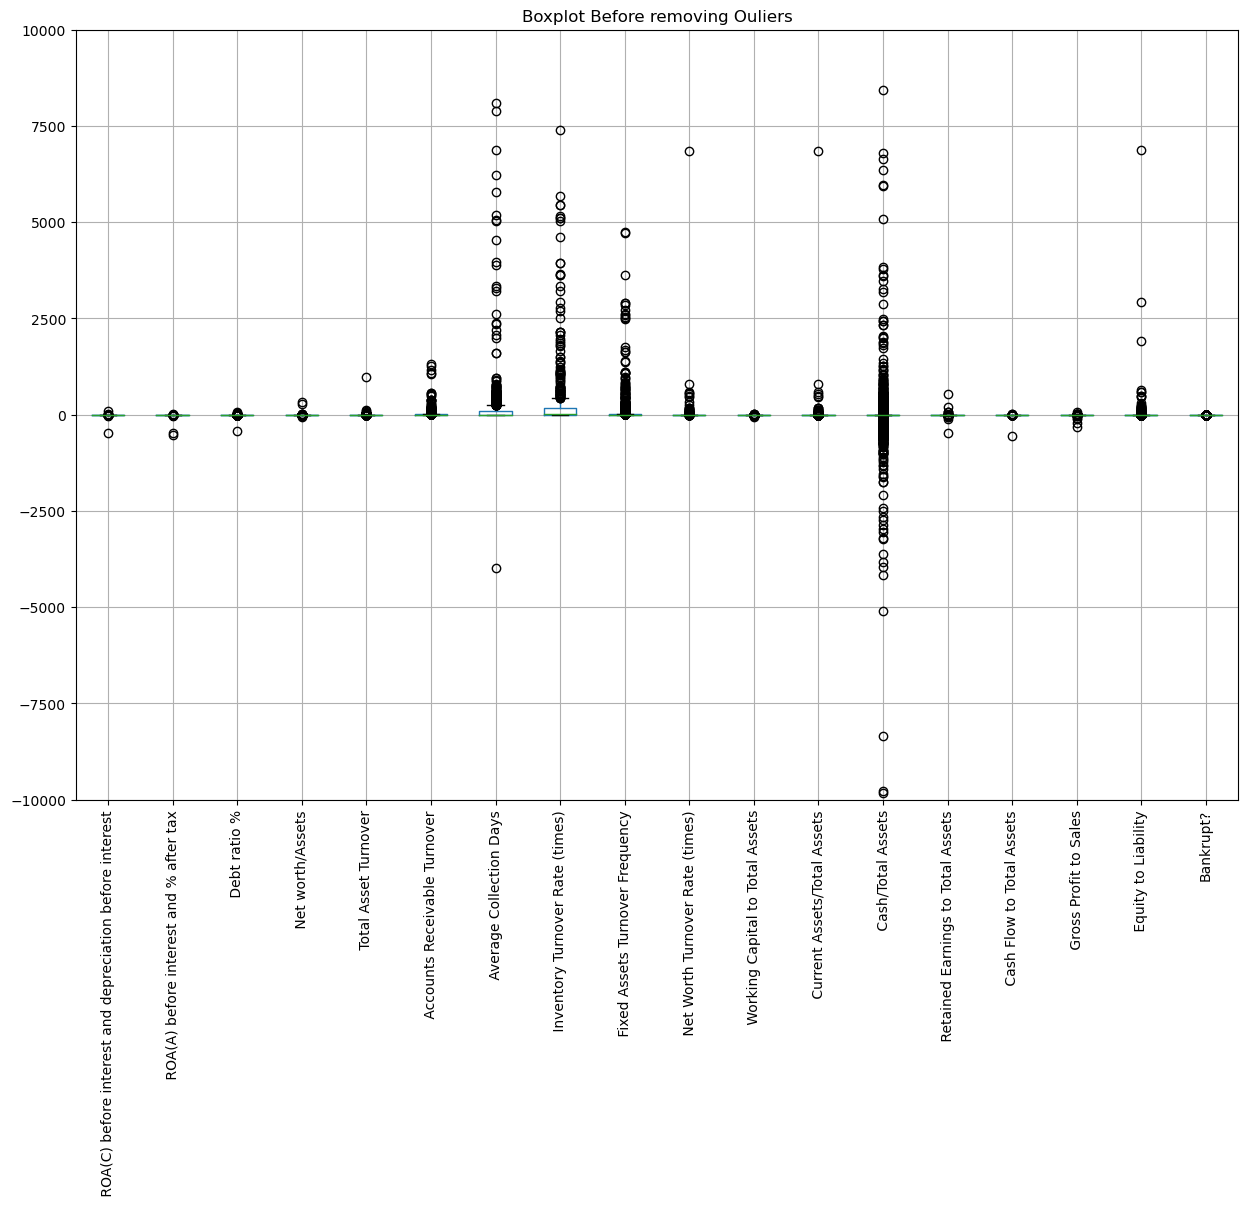

In [11]:
# Creating a boxplot of all the columns Before removing Ouliers
plt.figure(figsize=(15, 10))
cleaned_data.boxplot()
plt.xticks(rotation=90)
plt.ylim(-10000, 10000)
plt.title('Boxplot Before removing Ouliers')
plt.show()

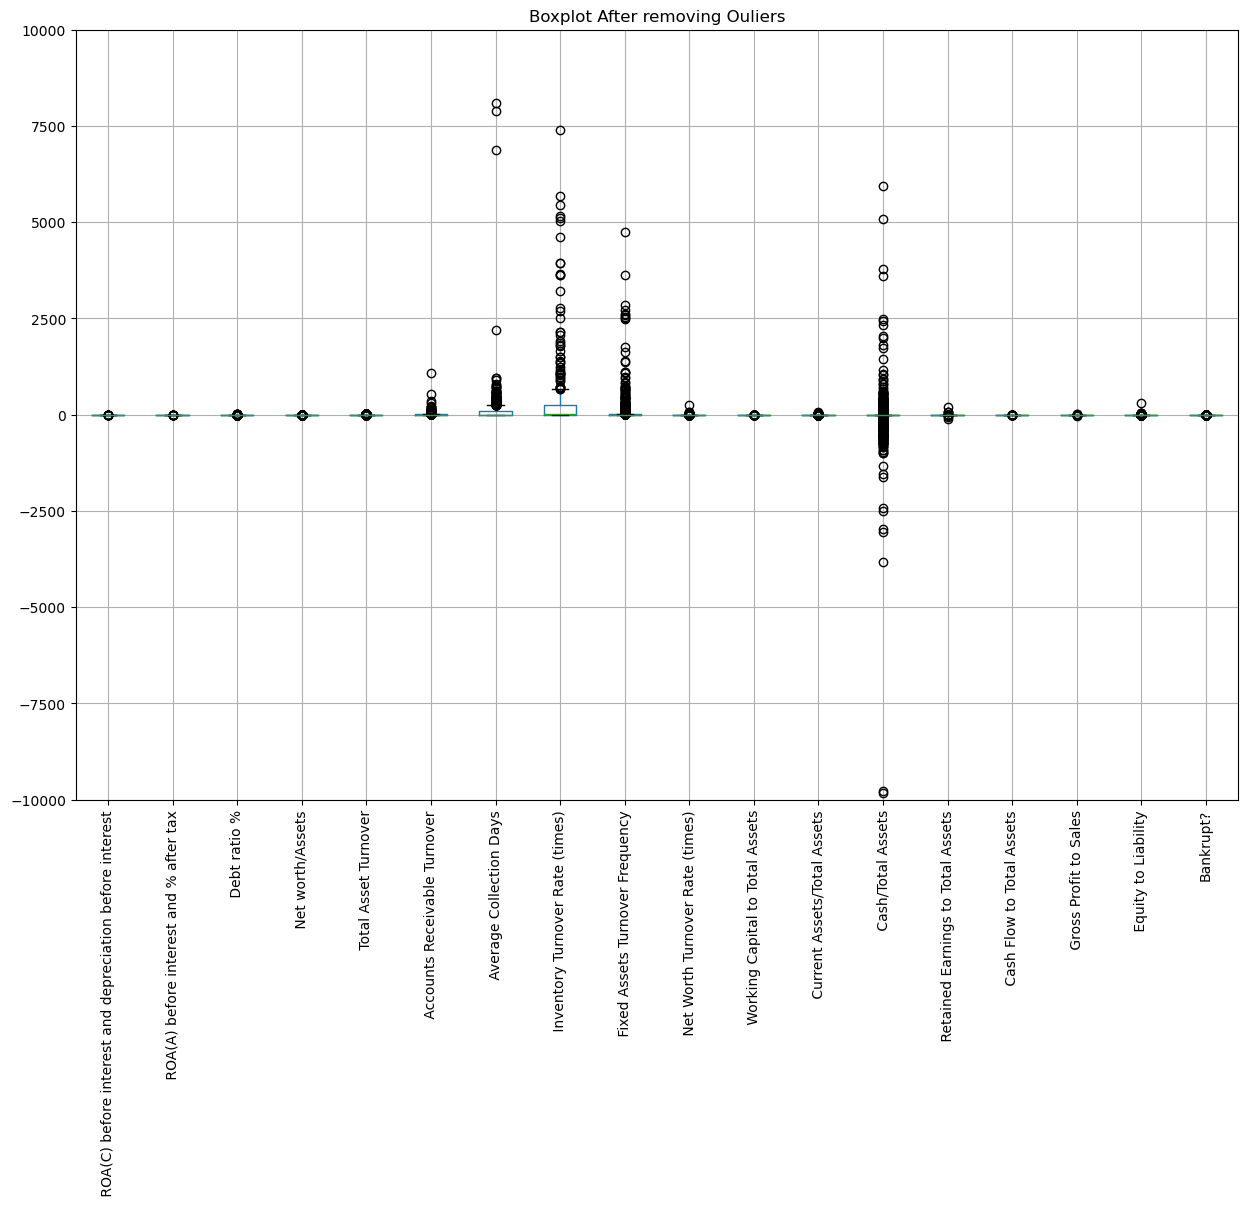

In [12]:
# Creating a boxplot of all the columns  After removing Ouliers
plt.figure(figsize=(15, 10))
cleaned_data_outliers_removed.boxplot()
plt.xticks(rotation=90)
plt.ylim(-10000, 10000)
plt.title('Boxplot After removing Ouliers')
plt.show()

## Normalize the data into [0,1] scale. 

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Identify columns to normalize (exclude "Bankrupt?")
columns_to_normalize = [col for col in cleaned_data_outliers_removed.columns if col != "Bankrupt?"]

# Initialize the MinMaxScaler with the desired range
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
standard_data = cleaned_data_outliers_removed.copy()
standard_data[columns_to_normalize] = scaler.fit_transform(cleaned_data_outliers_removed[columns_to_normalize])
# Ensure values remain within the range [0, 1]
standard_data[columns_to_normalize] = np.clip(standard_data[columns_to_normalize], 0, 1)

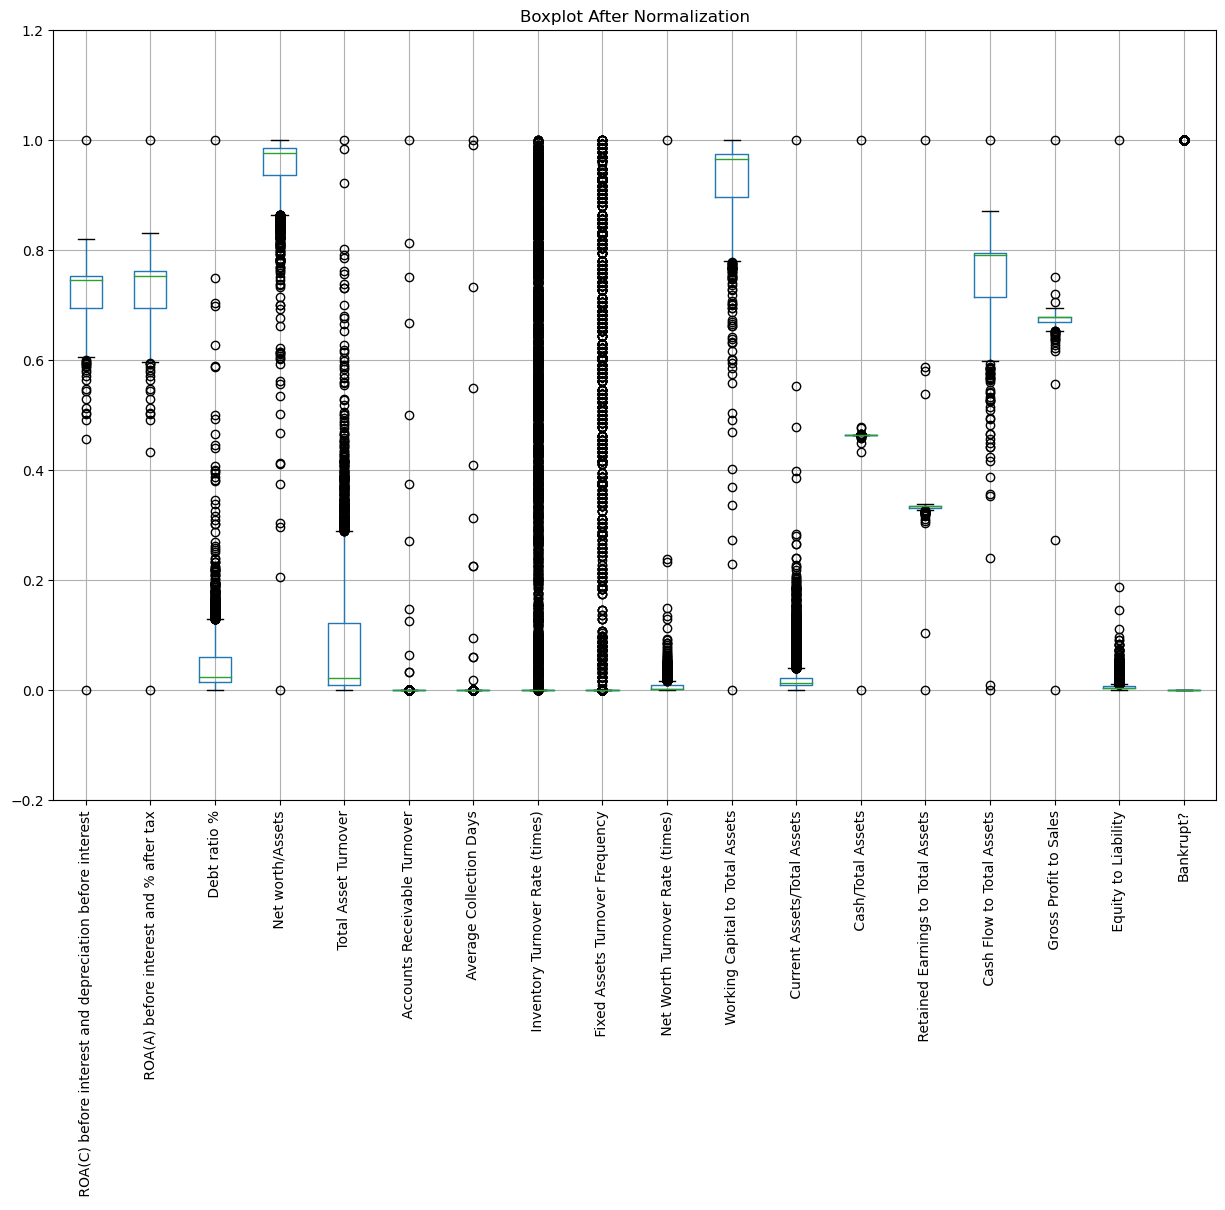

In [14]:
# Creating a boxplot of all the columns After Normalization
plt.figure(figsize=(15, 10))
standard_data.boxplot()
plt.xticks(rotation=90)
plt.ylim(-0.2, 1.2)
plt.title('Boxplot After Normalization')
plt.show()

## Check the Correlation between the Features and its Distribution

Sorted Correlation Matrix:


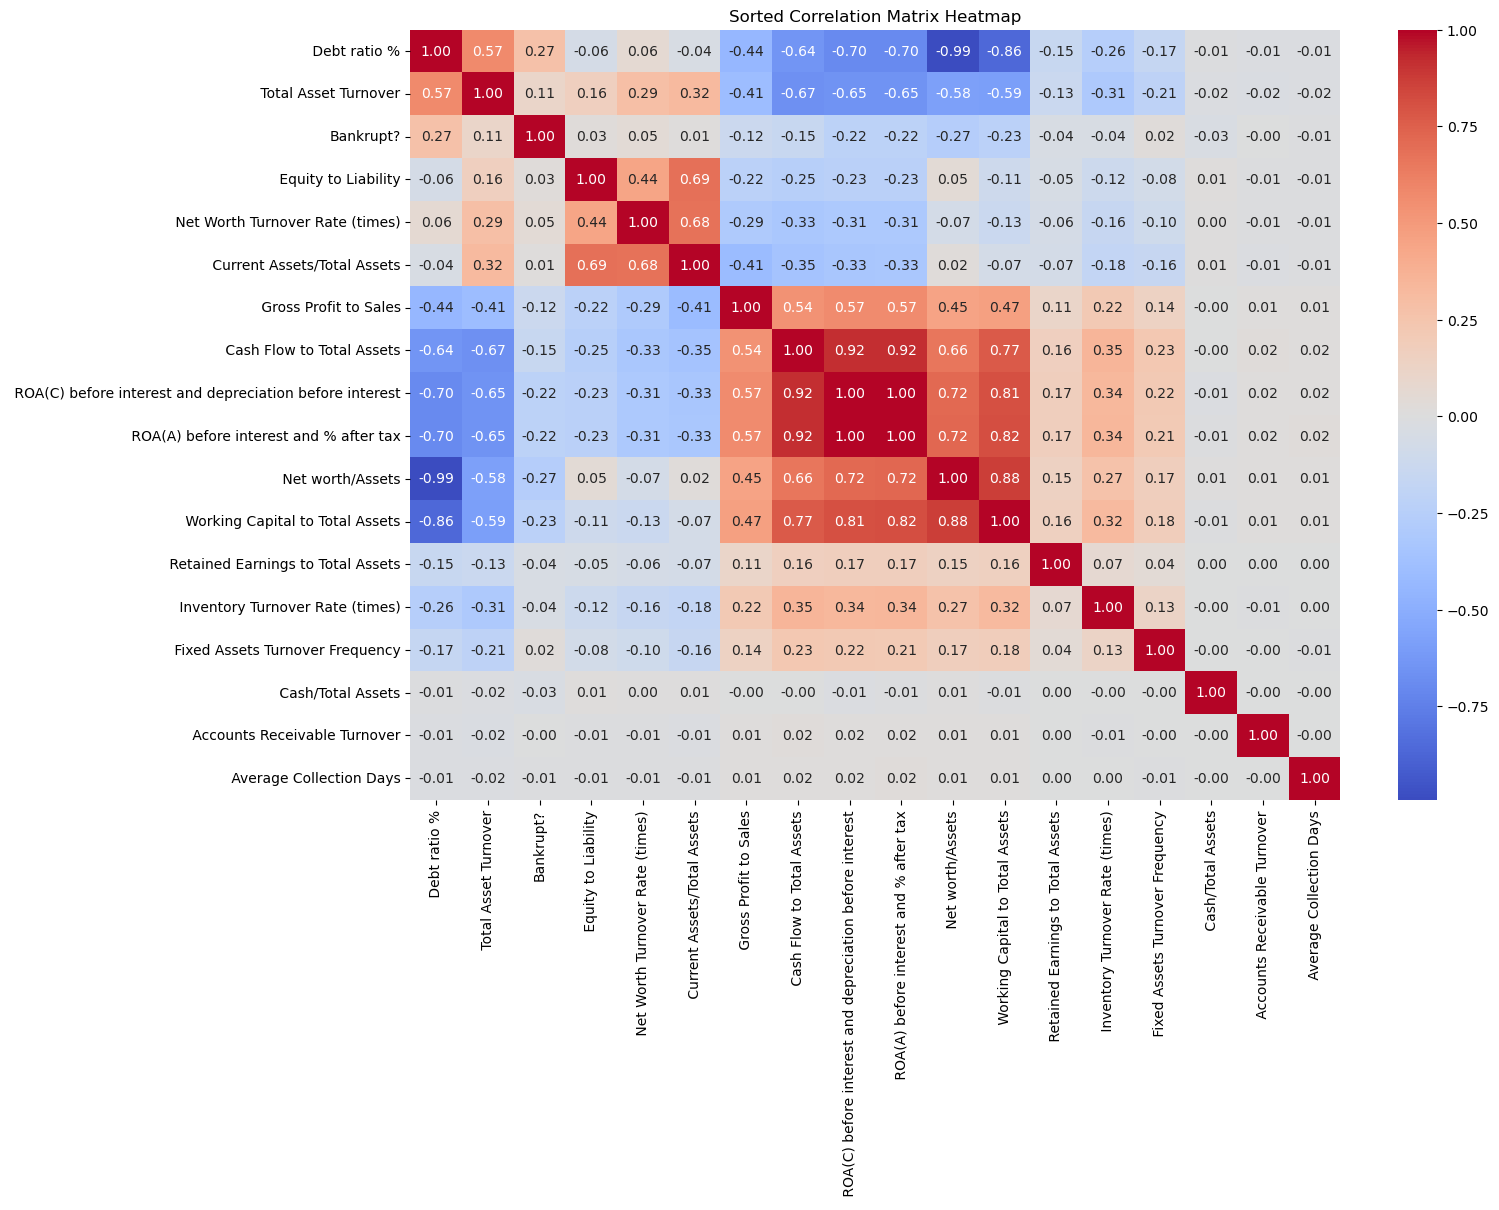

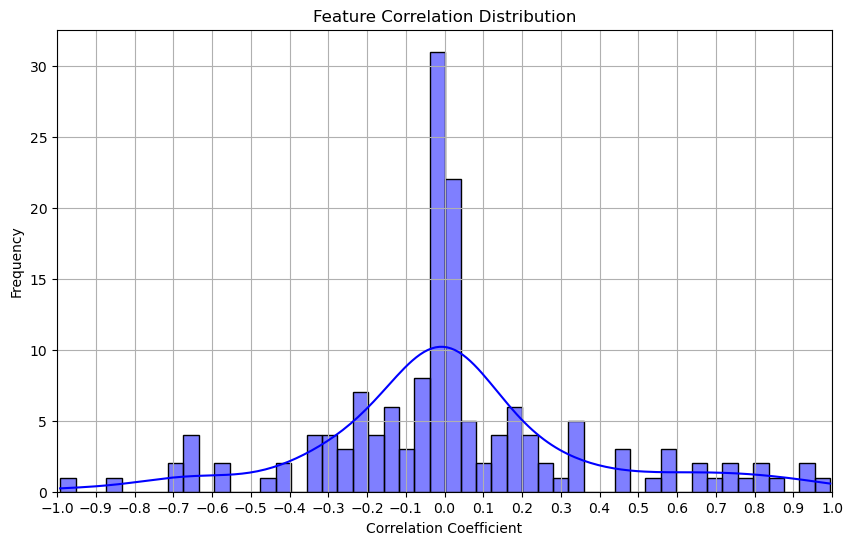

In [15]:
from scipy.cluster.hierarchy import linkage, leaves_list

# Create a correlation matrix
correlation_matrix = standard_data.corr()

# Apply hierarchical clustering to reorder the correlation matrix
corr_linkage = linkage(correlation_matrix, method='average')
cluster_order = leaves_list(corr_linkage)
sorted_corr_matrix = correlation_matrix.iloc[cluster_order, cluster_order]

# Display the sorted correlation matrix
print("Sorted Correlation Matrix:")

# Visualize the sorted correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sorted Correlation Matrix Heatmap')
plt.show()

# Plot the Feature Correlation Distribution
# Take the upper triangle of the correlation matrix without the diagonal
correlation_values = correlation_matrix.values
upper_triangle_indices = np.triu_indices_from(correlation_values, k=1)
correlation_values = correlation_values[upper_triangle_indices]

plt.figure(figsize=(10, 6))
sns.histplot(correlation_values, bins=50, kde=True, color='blue')
plt.title('Feature Correlation Distribution')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.xlim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.1))  # Set x-axis ticks at 0.1 intervals
plt.grid(True)
plt.show()


## Running the PCA algorithm on the data to combine features with high correlation values

In [16]:
from sklearn.decomposition import PCA
from collections import defaultdict
standard_data_with_pca = standard_data.copy()


# Find groups of highly correlated features
threshold = 0.90
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            rowname = correlation_matrix.columns[j]
            high_corr_pairs.append((rowname, colname))

# Group correlated features
correlated_groups = defaultdict(set)
for pair in high_corr_pairs:
    correlated_groups[pair[0]].add(pair[0])
    correlated_groups[pair[0]].add(pair[1])

# Print correlated groups
print("Correlated Groups:")
# Apply PCA to each group of correlated features
for group in correlated_groups.values():
    group = list(group)
    # Ensure all columns in the group are present in the dataframe
    group = [col for col in group if col in standard_data_with_pca.columns]
    if len(group) > 1:  # Apply PCA only if there are at least two columns
        print(group)
        pca = PCA(n_components=1)
        pca_components = pca.fit_transform(standard_data_with_pca[group])
        component_name = group[-1] + "_PCA"
        standard_data_with_pca[component_name] = pca_components
        standard_data_with_pca.drop(columns=group, inplace=True)
        
columns = [col for col in standard_data_with_pca.columns if col != "Bankrupt?"] + ["Bankrupt?"]
standard_data_with_pca = standard_data_with_pca[columns]


# Display the first few rows of the dataset with PCA components
print("First few rows of the dataset with PCA components:")
print(standard_data_with_pca.shape)
standard_data_with_pca.head()

Correlated Groups:
[' Cash Flow to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(C) before interest and depreciation before interest']
[' Debt ratio %', ' Net worth/Assets']
First few rows of the dataset with PCA components:
(12232, 15)


,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Working Capital to Total Assets,Current Assets/Total Assets,Cash/Total Assets,Retained Earnings to Total Assets,Gross Profit to Sales,Equity to Liability,ROA(C) before interest and depreciation before interest_PCA,Net worth/Assets_PCA,Bankrupt?
0,0.008290,1.706070e-13,4.792215e-13,1.621921e-14,1.453930e-14,0.001820,0.962336,0.005263,0.462669,0.333711,0.678509,0.002944,-0.036402,-0.014488,0.0
1,0.018065,1.370689e-13,5.969835e-13,1.992974e-14,5.187197e-14,0.001842,0.971744,0.007985,0.462669,0.333791,0.678173,0.003008,-0.054320,-0.036803,0.0
2,0.012744,1.337359e-13,6.115021e-13,3.044928e-14,2.461079e-14,0.001773,0.974073,0.007391,0.462669,0.333790,0.678208,0.003111,-0.051858,-0.047063,0.0
3,0.028706,1.508175e-13,5.419203e-13,2.061829e-14,7.390809e-14,0.001966,0.975738,0.010289,0.462669,0.333800,0.678127,0.002994,-0.052186,-0.034096,0.0
4,0.006310,1.991457e-13,4.103925e-13,1.564542e-14,1.749259e-14,0.001739,0.965369,0.001814,0.462669,0.333815,0.678399,0.003013,-0.052470,-0.037760,0.0


Correlation Matrix:


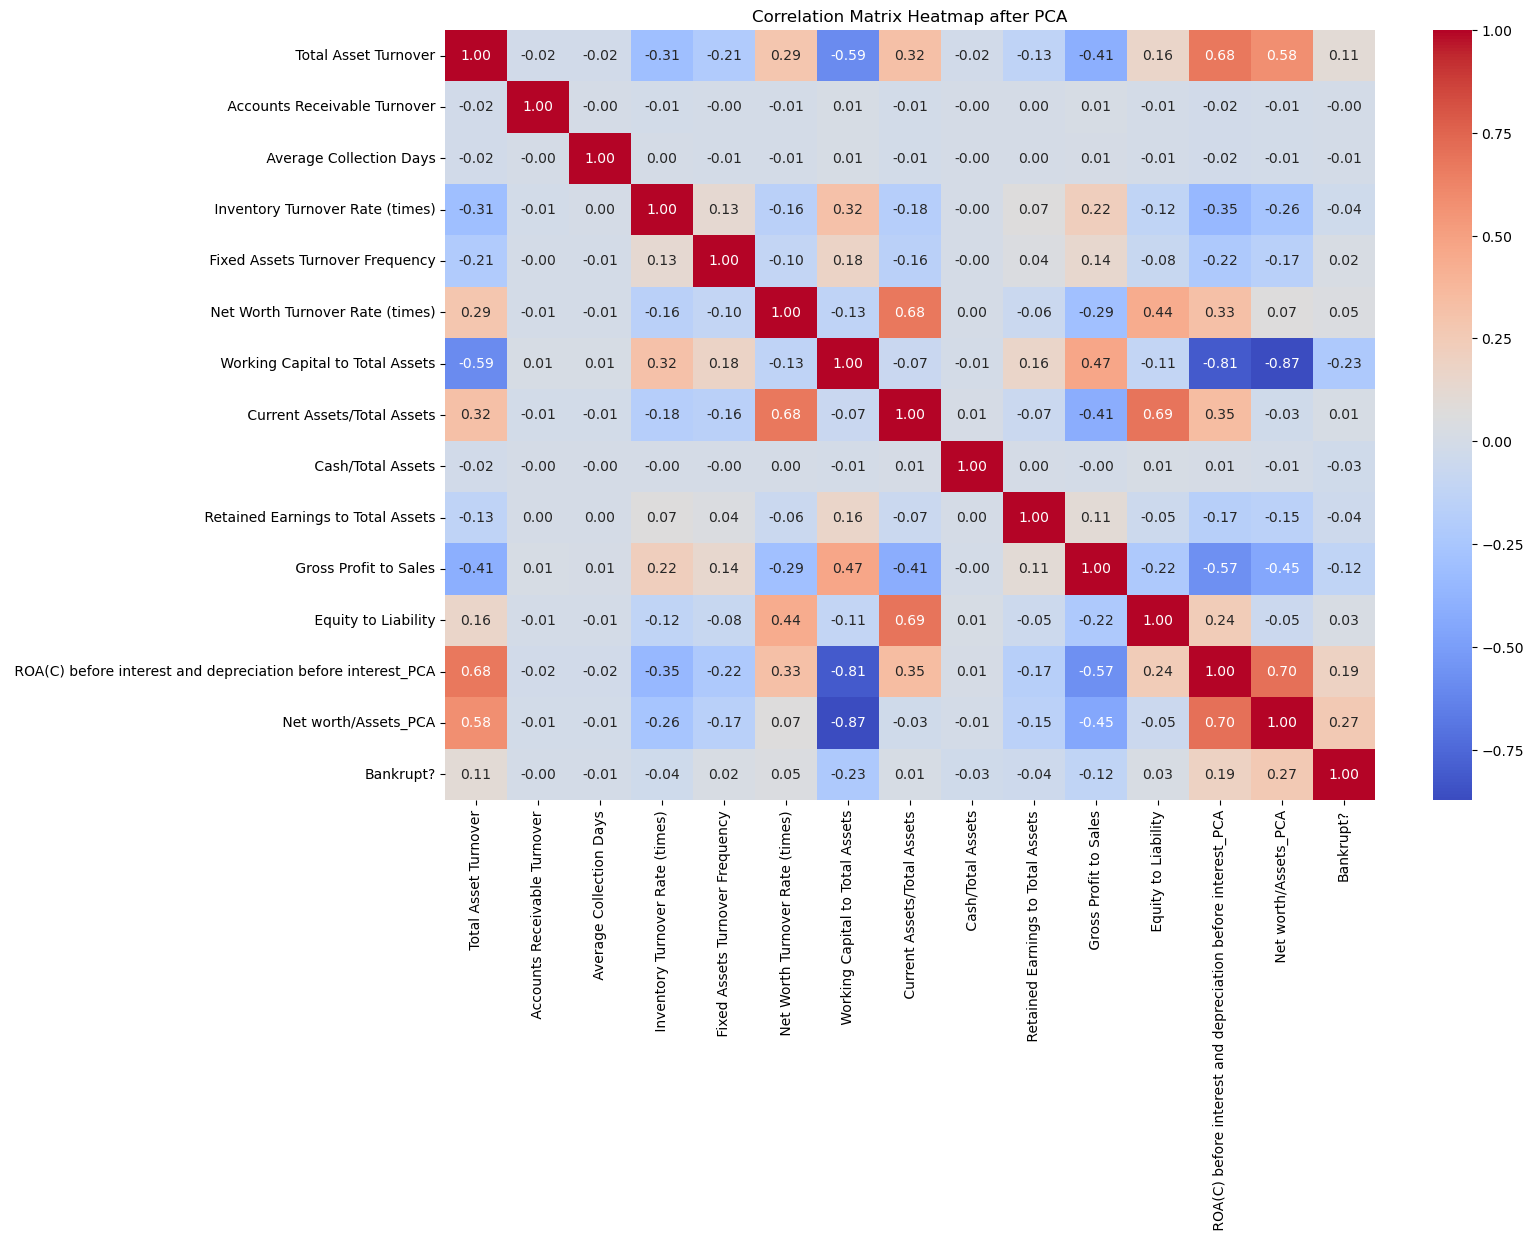

In [17]:
# Create a correlation matrix
correlation_matrix = standard_data_with_pca.corr()

# Display the correlation matrix
print("Correlation Matrix:")


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap after PCA')
plt.show()

## Checking the correlations of the features with the Targer 'Bankrupt?'

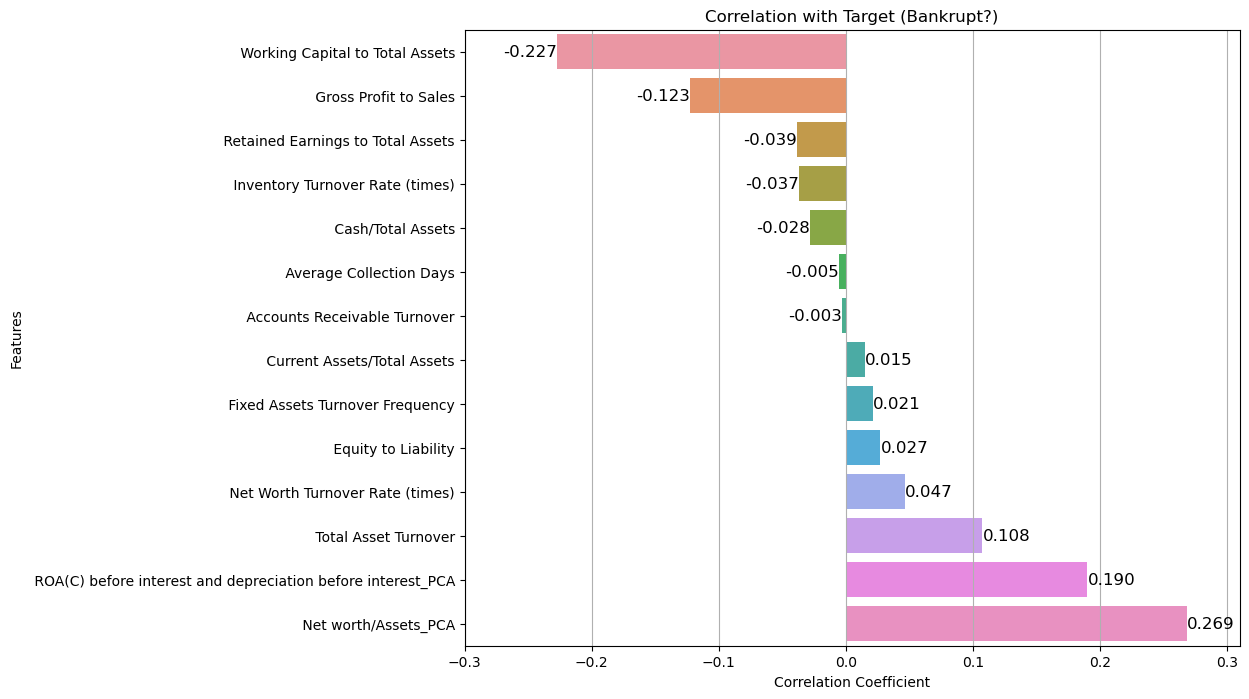

In [18]:
from scipy.cluster.hierarchy import linkage, leaves_list


# Create a correlation matrix
correlation_matrix = standard_data_with_pca.corr()['Bankrupt?'].drop('Bankrupt?').sort_values()

# Plot the correlation with the target
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_matrix.values, y=correlation_matrix.index)
plt.title('Correlation with Target (Bankrupt?)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.xlim(-0.3, 0.31)  # Set limits for x-axis to cover correlation range
plt.grid(axis='x')  # Add gridlines for better readability
plt.xticks(fontsize=10)  # Adjust font size for x-axis labels
plt.yticks(fontsize=10)  # Adjust font size for y-axis labels
# Annotate each bar with its correlation value
for index, value in enumerate(correlation_matrix.values):
    plt.text(value, index, f'{value:.3f}', va='center', ha='right' if value < 0 else 'left', fontsize=12, color='black')
plt.show()

## Checking the features importance of the features at the RandomForestClassifier Model

Selected Features based on Random Forest Importance:
10                                Gross Profit to Sales
12     ROA(C) before interest and depreciation befor...
11                                  Equity to Liability
13                                 Net worth/Assets_PCA
6                       Working Capital to Total Assets
9                     Retained Earnings to Total Assets
5                       Net Worth Turnover Rate (times)
7                           Current Assets/Total Assets
0                                  Total Asset Turnover
8                                     Cash/Total Assets
3                       Inventory Turnover Rate (times)
4                       Fixed Assets Turnover Frequency
Name: Feature, dtype: object

Removed Features based on Random Forest Importance:
1     Accounts Receivable Turnover
2          Average Collection Days
Name: Feature, dtype: object

First few rows of the dataframe with selected features:
(12232, 13)


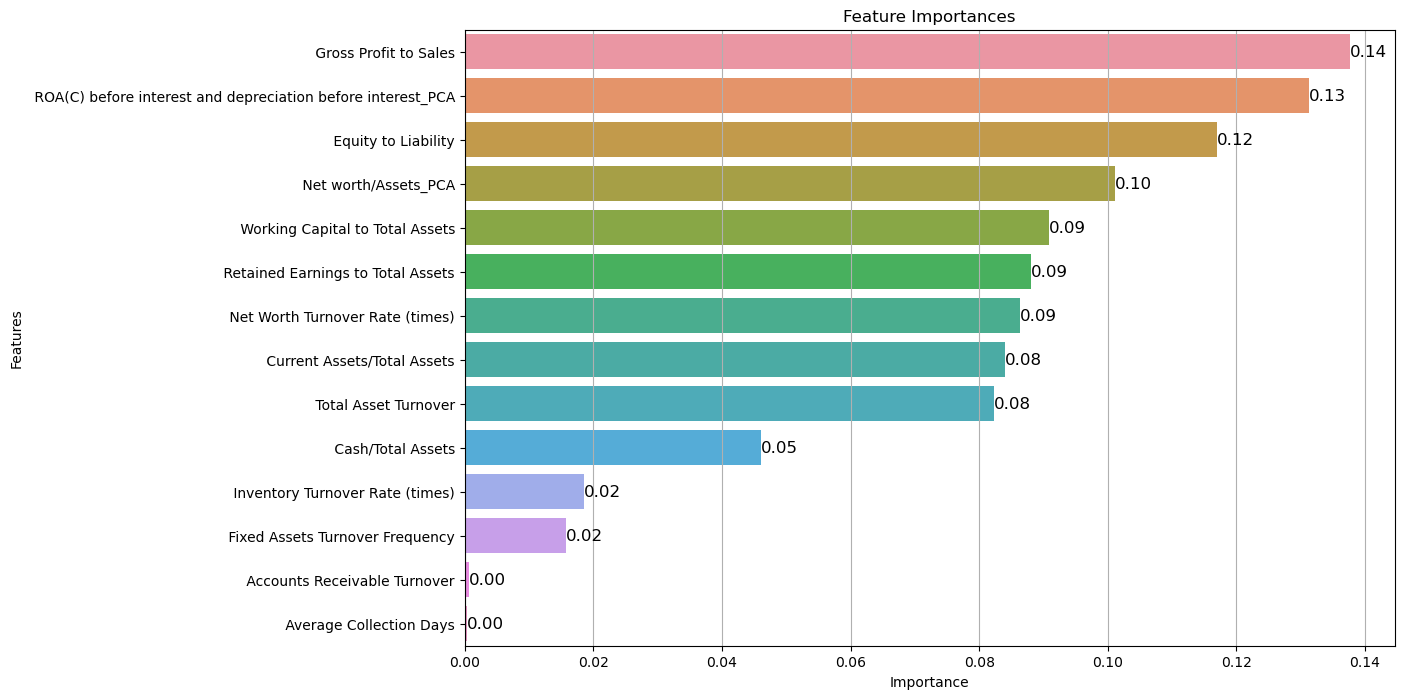

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset (assuming standard_data_with_pca is already in the environment)
data = standard_data_with_pca.copy()

# Separate features and target
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance
importance_threshold = 0.01

# Select features above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature']

print("Selected Features based on Random Forest Importance:")
print(selected_features)

# Identify features removed by Random Forest Importance
removed_features = feature_importance_df[feature_importance_df['Importance'] <= importance_threshold]['Feature']

print("\nRemoved Features based on Random Forest Importance:")
print(removed_features)

# Create a new dataframe with only the selected features
X_selected = X[selected_features]

# Add the target variable back to the dataframe
final_data_with_selected_features = pd.concat([X_selected, y.reset_index(drop=True)], axis=1)

# Display the first few rows of the final dataframe
print("\nFirst few rows of the dataframe with selected features:")
print(final_data_with_selected_features.shape)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(axis='x')  # Add gridlines for better readability

# Annotate each bar with its importance value
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black')

plt.show()


## Method : GridSearchCV with BalancedBaggingClassifier

C:\Users\PC\anaconda3\Lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Model: Random Forest
Best Parameters: {'base_estimator__max_depth': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__n_estimators': 200}
Accuracy: 0.86
Best Cross-Validation Accuracy: 0.85
Best Cross-Validation F1-Score: 0.33
Best Cross-Validation Recall: 0.75
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      2324
         1.0       0.23      0.73      0.35       123

    accuracy                           0.86      2447
   macro avg       0.61      0.80      0.63      2447
weighted avg       0.95      0.86      0.89      2447

Confusion Matrix:


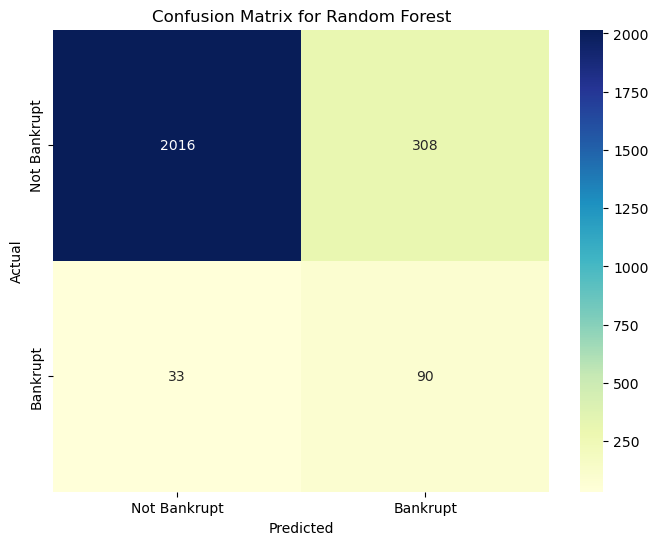

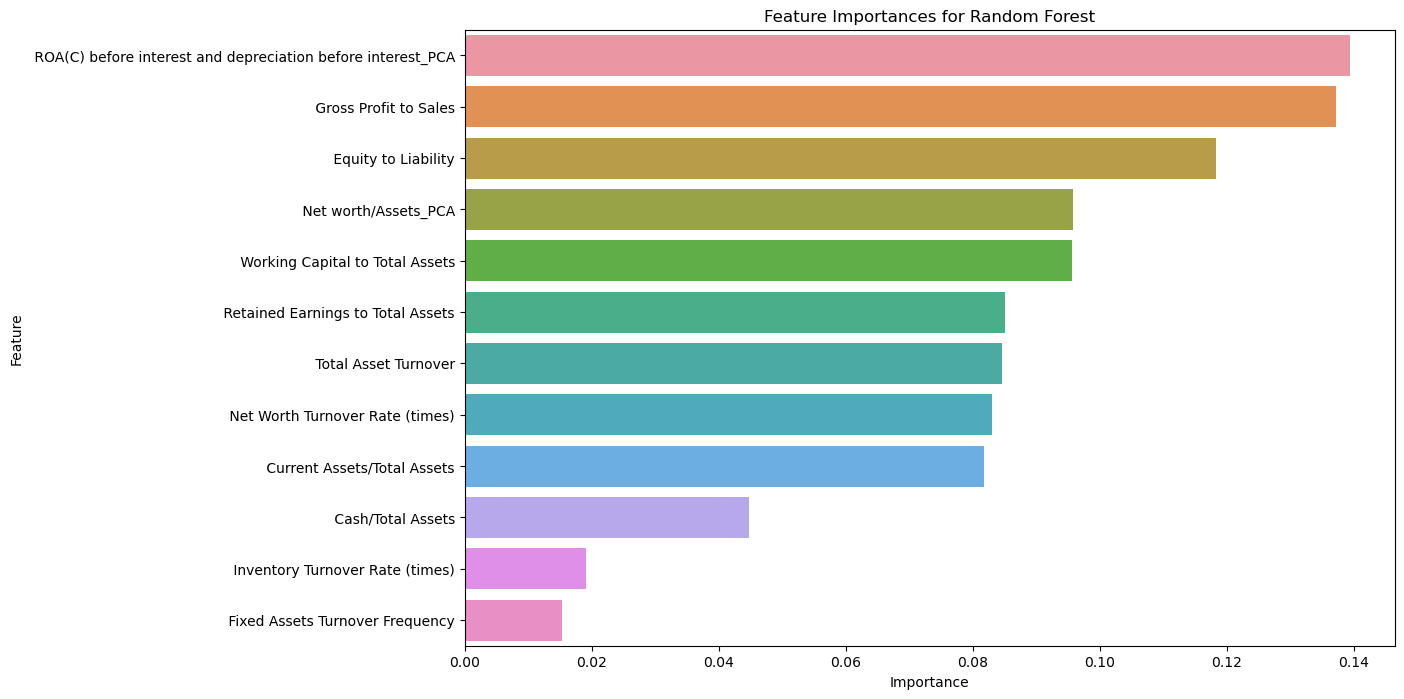

Depth of the Random Forest model: None


C:\Users\PC\anaconda3\Lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Model: Gradient Boosting
Best Parameters: {'base_estimator__learning_rate': 0.1, 'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__n_estimators': 200}
Accuracy: 0.86
Best Cross-Validation Accuracy: 0.85
Best Cross-Validation F1-Score: 0.34
Best Cross-Validation Recall: 0.75
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      2324
         1.0       0.23      0.72      0.35       123

    accuracy                           0.86      2447
   macro avg       0.61      0.79      0.63      2447
weighted avg       0.95      0.86      0.89      2447

Confusion Matrix:


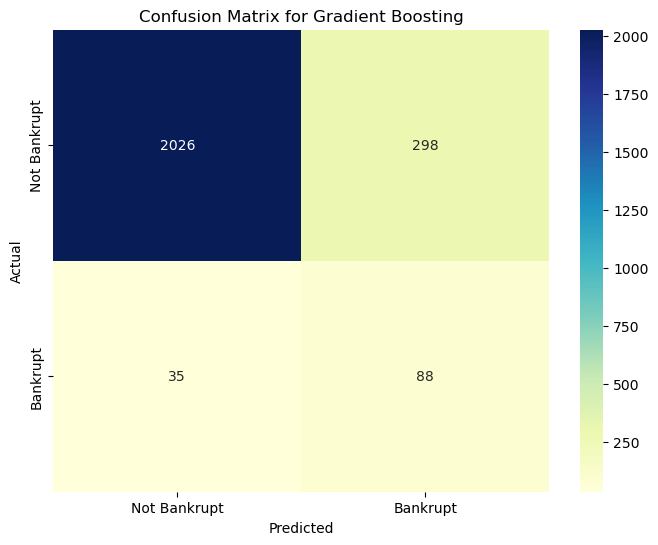

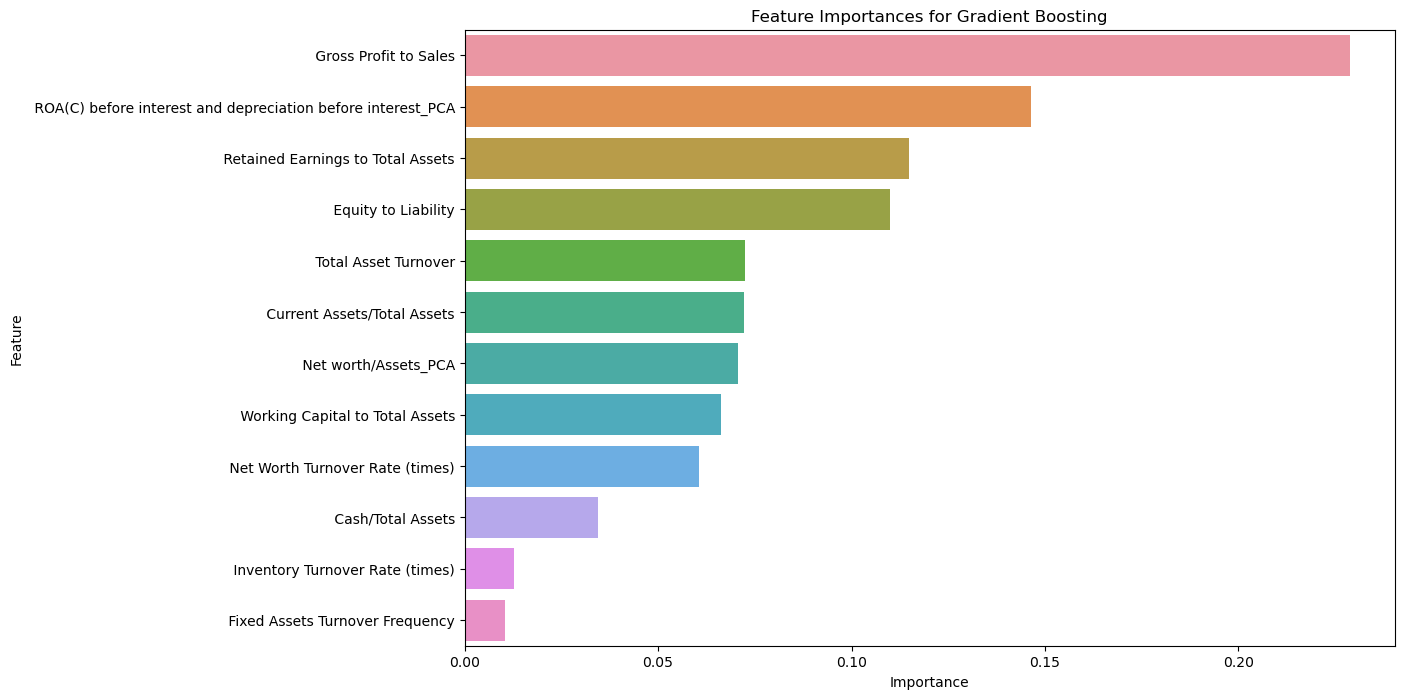

C:\Users\PC\anaconda3\Lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Model: Decision Tree
Best Parameters: {'base_estimator__max_depth': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2}
Accuracy: 0.87
Best Cross-Validation Accuracy: 0.86
Best Cross-Validation F1-Score: 0.33
Best Cross-Validation Recall: 0.68
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      2324
         1.0       0.23      0.67      0.34       123

    accuracy                           0.87      2447
   macro avg       0.60      0.77      0.63      2447
weighted avg       0.94      0.87      0.90      2447

Confusion Matrix:


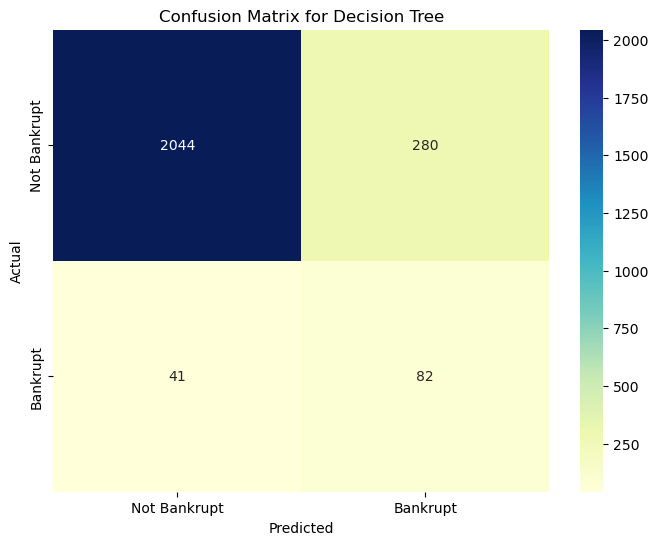

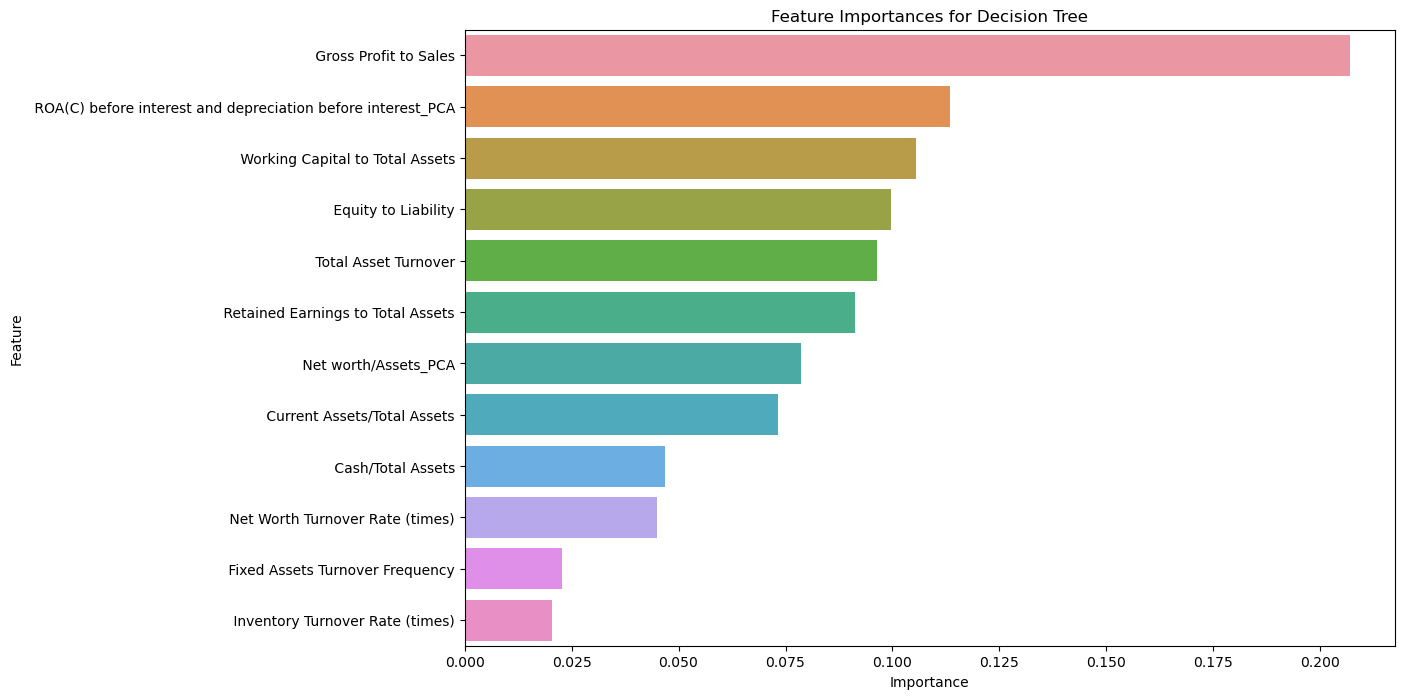

C:\Users\PC\anaconda3\Lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Model: AdaBoost
Best Parameters: {'base_estimator__learning_rate': 0.1, 'base_estimator__n_estimators': 50}
Accuracy: 0.85
Best Cross-Validation Accuracy: 0.84
Best Cross-Validation F1-Score: 0.32
Best Cross-Validation Recall: 0.74
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      2324
         1.0       0.20      0.67      0.31       123

    accuracy                           0.85      2447
   macro avg       0.59      0.76      0.61      2447
weighted avg       0.94      0.85      0.88      2447

Confusion Matrix:


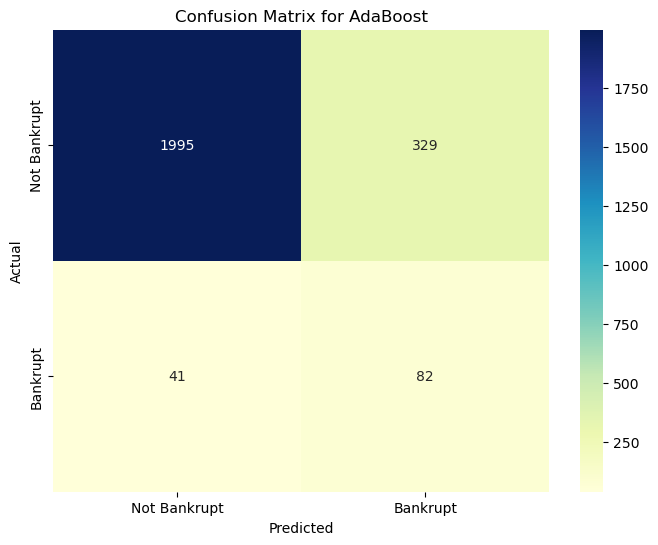

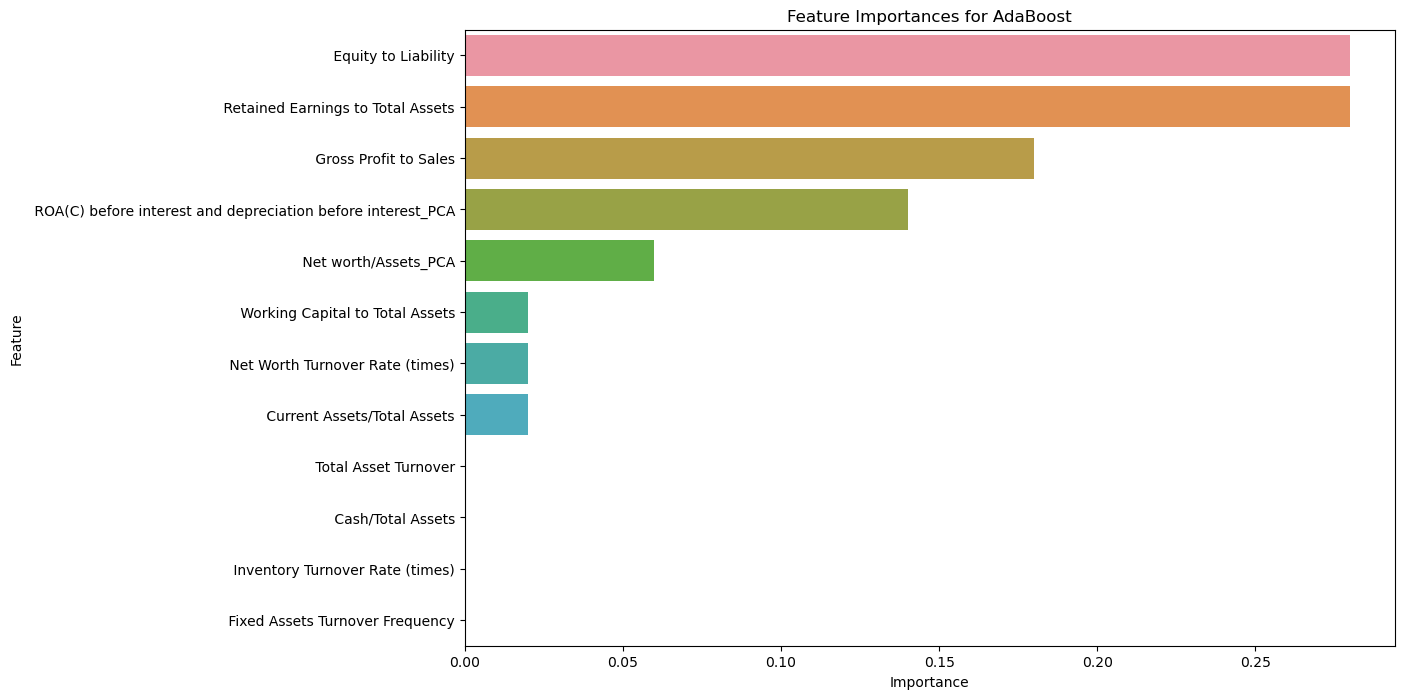

C:\Users\PC\anaconda3\Lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Model: Extra Trees
Best Parameters: {'base_estimator__max_depth': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__n_estimators': 100}
Accuracy: 0.88
Best Cross-Validation Accuracy: 0.87
Best Cross-Validation F1-Score: 0.36
Best Cross-Validation Recall: 0.72
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      2324
         1.0       0.24      0.66      0.35       123

    accuracy                           0.88      2447
   macro avg       0.61      0.77      0.64      2447
weighted avg       0.94      0.88      0.90      2447

Confusion Matrix:


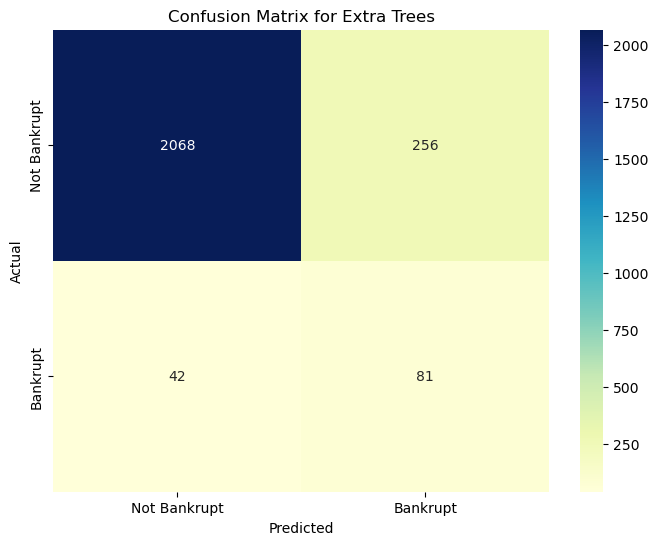

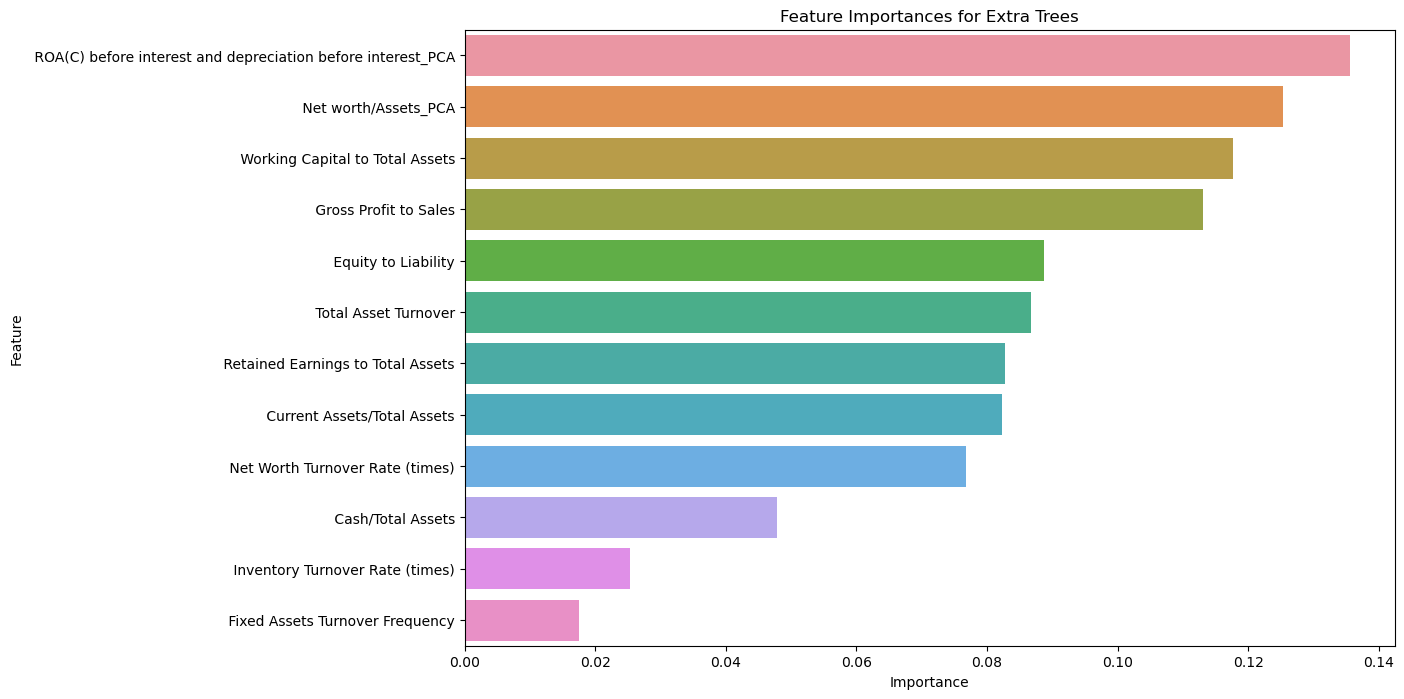

C:\Users\PC\anaconda3\Lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Model: XGBoost
Best Parameters: {'base_estimator__learning_rate': 0.1, 'base_estimator__max_depth': 5, 'base_estimator__min_child_weight': 1, 'base_estimator__n_estimators': 200}
Accuracy: 0.86
Best Cross-Validation Accuracy: 0.85
Best Cross-Validation F1-Score: 0.33
Best Cross-Validation Recall: 0.75
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      2324
         1.0       0.22      0.72      0.33       123

    accuracy                           0.86      2447
   macro avg       0.60      0.79      0.63      2447
weighted avg       0.94      0.86      0.89      2447

Confusion Matrix:


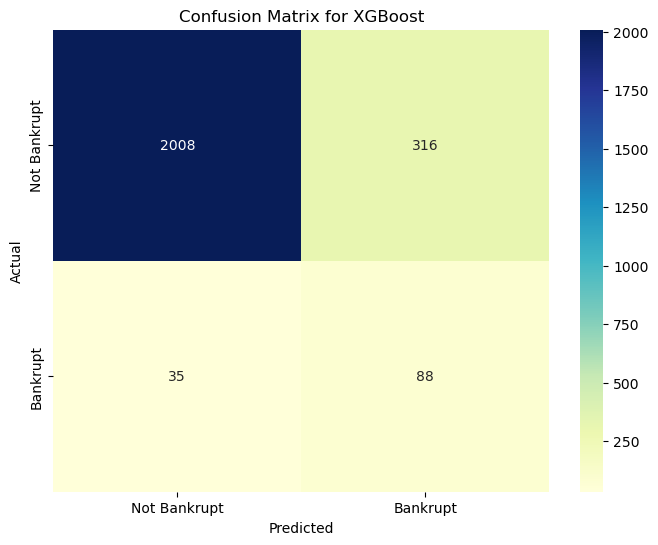

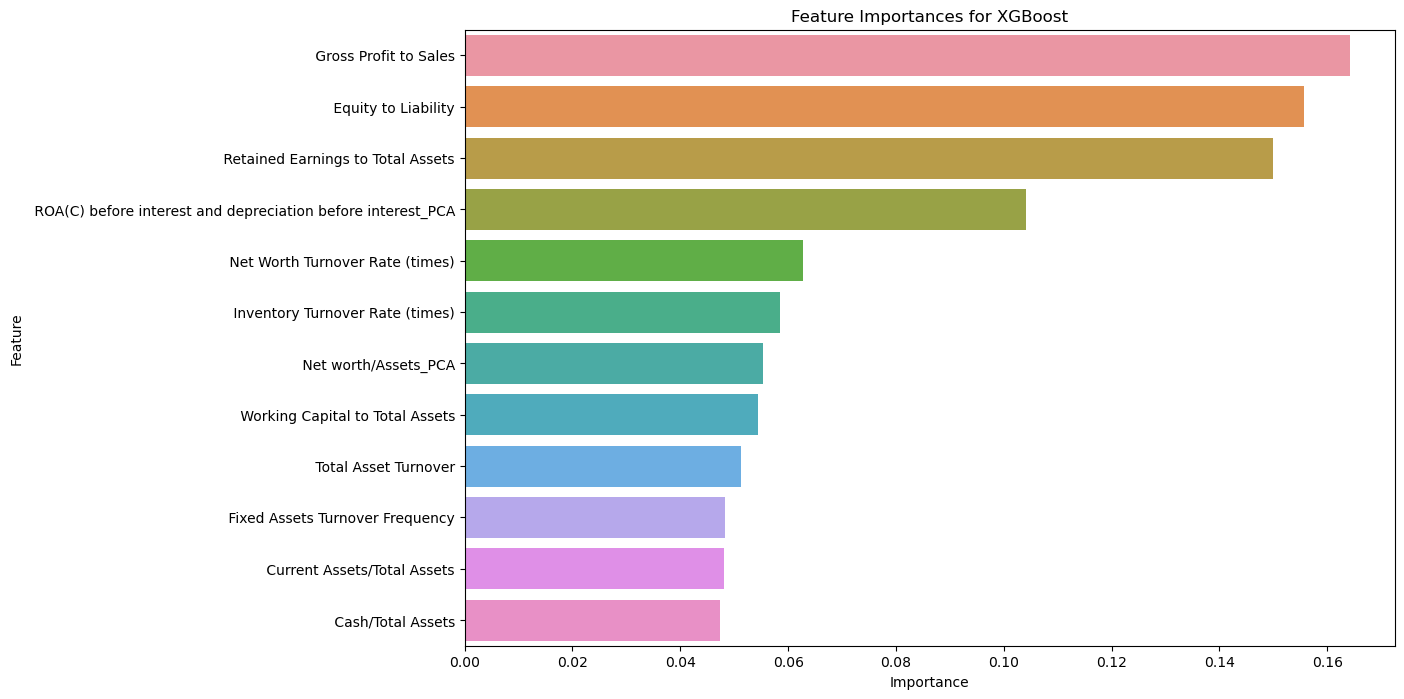

C:\Users\PC\anaconda3\Lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Model: LightGBM
Best Parameters: {'base_estimator__learning_rate': 0.1, 'base_estimator__min_child_samples': 10, 'base_estimator__n_estimators': 200, 'base_estimator__num_leaves': 40}
Accuracy: 0.87
Best Cross-Validation Accuracy: 0.86
Best Cross-Validation F1-Score: 0.35
Best Cross-Validation Recall: 0.75
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.93      2324
         1.0       0.23      0.70      0.34       123

    accuracy                           0.87      2447
   macro avg       0.61      0.79      0.63      2447
weighted avg       0.94      0.87      0.90      2447

Confusion Matrix:


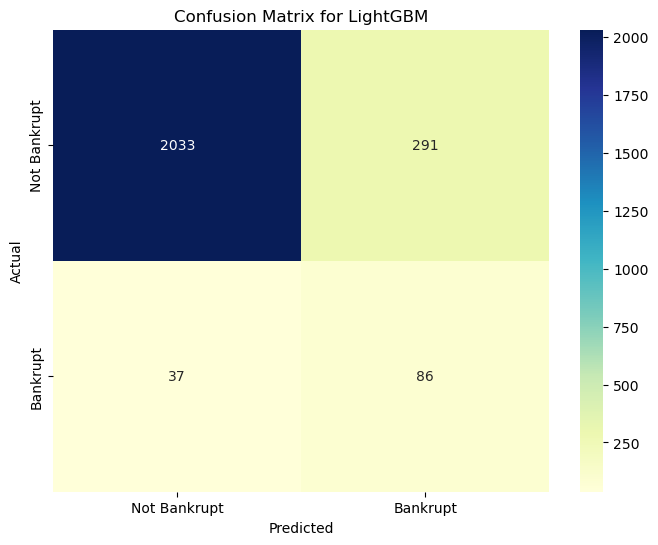

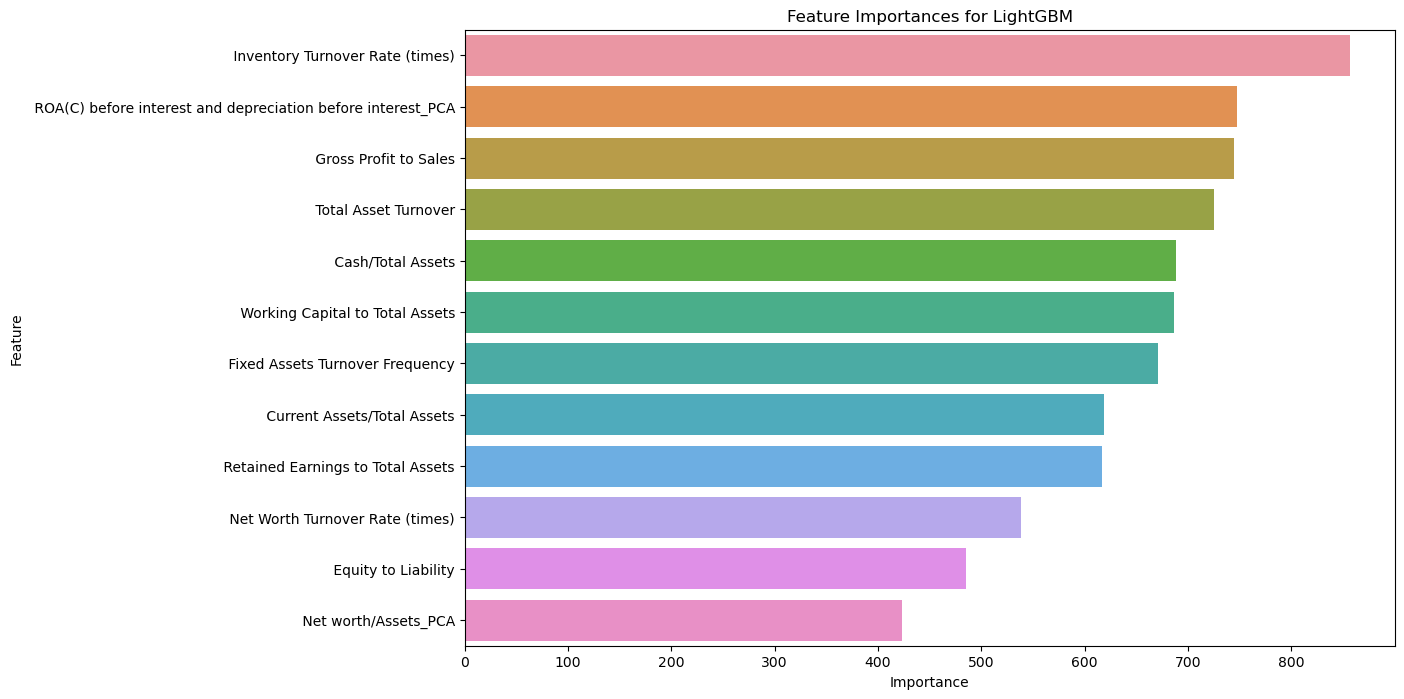

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, f1_score, recall_score
from imblearn.ensemble import BalancedBaggingClassifier
# Load the data
data = final_data_with_selected_features.copy()

X = data.drop(['Bankrupt?'], axis=1)
y = data['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and parameter grids
models_and_params = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'base_estimator__n_estimators': [100, 200],
            'base_estimator__max_depth': [None, 10, 20],
            'base_estimator__min_samples_split': [2, 5],
            'base_estimator__min_samples_leaf': [1, 2]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            'base_estimator__n_estimators': [100, 200],
            'base_estimator__learning_rate': [0.01, 0.1],
            'base_estimator__max_depth': [3, 5],
            'base_estimator__min_samples_split': [2, 5],
            'base_estimator__min_samples_leaf': [1, 2]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'base_estimator__max_depth': [None, 10, 20],
            'base_estimator__min_samples_split': [2, 5],
            'base_estimator__min_samples_leaf': [1, 2]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            'base_estimator__n_estimators': [50, 100],
            'base_estimator__learning_rate': [0.01, 0.1, 1.0]
        }
    },
    "Extra Trees": {
        "model": ExtraTreesClassifier(random_state=42),
        "params": {
            'base_estimator__n_estimators': [100, 200],
            'base_estimator__max_depth': [None, 10, 20],
            'base_estimator__min_samples_split': [2, 5],
            'base_estimator__min_samples_leaf': [1, 2]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "params": {
            'base_estimator__n_estimators': [100, 200],
            'base_estimator__learning_rate': [0.01, 0.1],
            'base_estimator__max_depth': [3, 5],
            'base_estimator__min_child_weight': [1, 3]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42, verbose=-1),
        "params": {
            'base_estimator__n_estimators': [100, 200],
            'base_estimator__learning_rate': [0.01, 0.1],
            'base_estimator__num_leaves': [31, 40],
            'base_estimator__min_child_samples': [10, 20]
        }
    }
}

results = []

for name, mp in models_and_params.items():
    base_model = mp['model']
    param_grid = mp['params']
    
    bbc = BalancedBaggingClassifier(base_estimator=base_model, random_state=42)
    scoring = {'accuracy': 'accuracy', 'f1': make_scorer(f1_score, pos_label=1), 'recall': make_scorer(recall_score, pos_label=1)}
    grid_search = GridSearchCV(bbc, param_grid, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Extract best cross-validation scores
    best_cv_score = grid_search.best_score_
    best_cv_f1_score = grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]
    best_cv_recall = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]
    
    results.append({
        "Model": name,
        "Best Parameters": grid_search.best_params_,
        "Accuracy": accuracy,
        "Best Cross-Validation Accuracy": best_cv_score,
        "Best Cross-Validation F1-Score": best_cv_f1_score,
        "Best Cross-Validation Recall": best_cv_recall,
        "Classification Report": class_report,
        "Confusion Matrix": conf_matrix
    })
    
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Best Cross-Validation Accuracy: {best_cv_score:.2f}")
    print(f"Best Cross-Validation F1-Score: {best_cv_f1_score:.2f}")
    print(f"Best Cross-Validation Recall: {best_cv_recall:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Not Bankrupt", "Bankrupt"], yticklabels=["Not Bankrupt", "Bankrupt"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    best_param = grid_search.best_params_
    model = models_and_params[name]["model"]
    model_params = {k.replace('base_estimator__', ''): v for k, v in best_param.items()}
    model.set_params(**model_params)
    
    model.fit(X_train, y_train)
    
    # Plot feature importances if the model supports it
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = X.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Feature Importances for {name}')
        plt.show()

    # Print the depth of the Random Forest model
    if name == "Random Forest":
        print(f"Depth of the Random Forest model: {model.get_params()['max_depth']}")


## Method : Cross Validation with Regular Bagging

### This Chunck take too long while running, you could reduce the n_iterations parameter to get a result faster.

Model: Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.83
Best Cross-Validation Score: 0.96
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      2324
         1.0       0.17      0.80      0.28       123

    accuracy                           0.79      2447
   macro avg       0.58      0.79      0.58      2447
weighted avg       0.95      0.79      0.85      2447

Confusion Matrix:


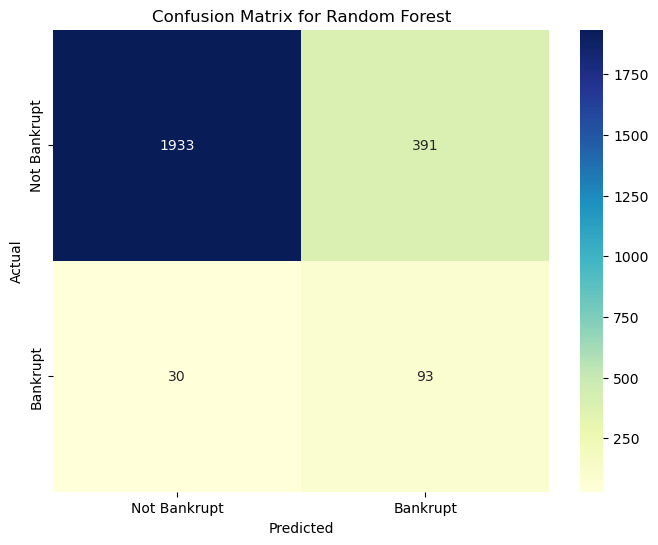

Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.84
Best Cross-Validation Score: 0.95
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      2324
         1.0       0.17      0.79      0.27       123

    accuracy                           0.79      2447
   macro avg       0.58      0.79      0.57      2447
weighted avg       0.94      0.79      0.85      2447

Confusion Matrix:


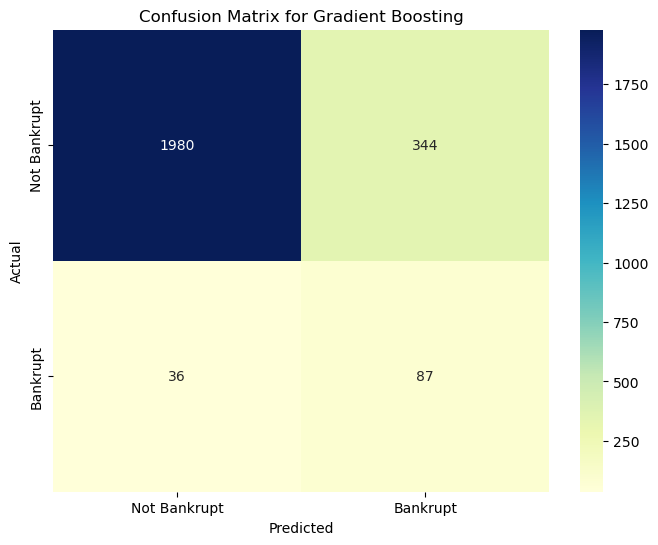

Model: Decision Tree
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.84
Best Cross-Validation Score: 0.95
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87      2324
         1.0       0.15      0.72      0.25       123

    accuracy                           0.78      2447
   macro avg       0.57      0.75      0.56      2447
weighted avg       0.94      0.78      0.84      2447

Confusion Matrix:


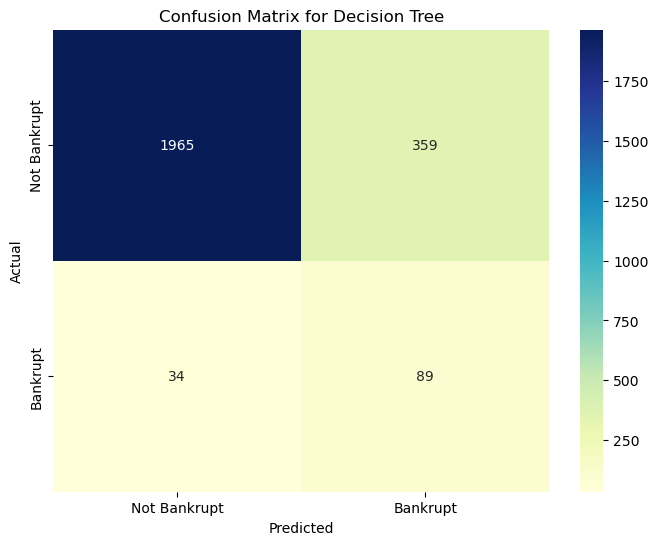

Model: AdaBoost
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy: 0.86
Best Cross-Validation Score: 0.95
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87      2324
         1.0       0.16      0.76      0.26       123

    accuracy                           0.78      2447
   macro avg       0.57      0.77      0.57      2447
weighted avg       0.94      0.78      0.84      2447

Confusion Matrix:


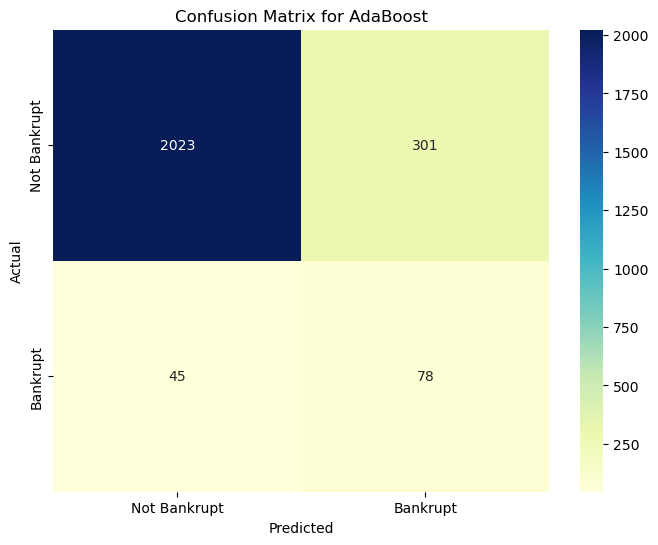

Model: Extra Trees
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.82
Best Cross-Validation Score: 0.95
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      2324
         1.0       0.17      0.82      0.28       123

    accuracy                           0.79      2447
   macro avg       0.58      0.81      0.58      2447
weighted avg       0.95      0.79      0.85      2447

Confusion Matrix:


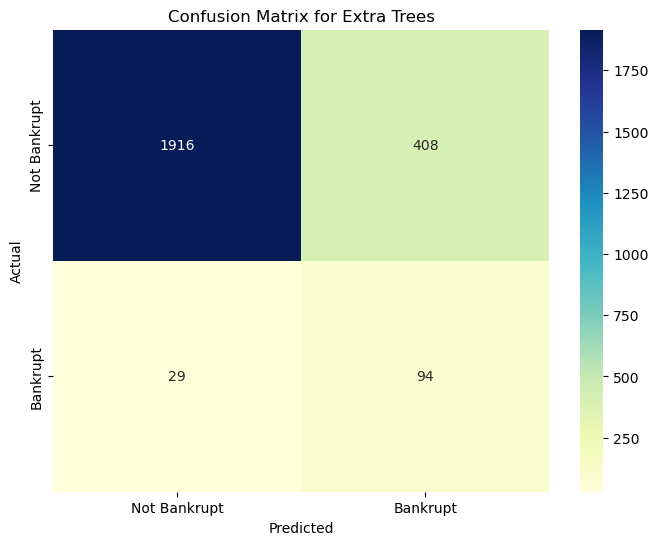

Model: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
Accuracy: 0.85
Best Cross-Validation Score: 0.95
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.87      2324
         1.0       0.16      0.79      0.27       123

    accuracy                           0.79      2447
   macro avg       0.57      0.79      0.57      2447
weighted avg       0.94      0.79      0.84      2447

Confusion Matrix:


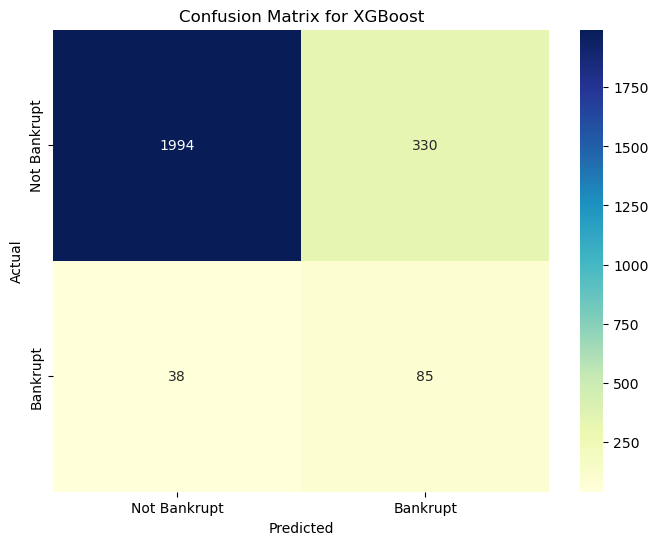

Model: LightGBM
Best Parameters: {'learning_rate': 0.01, 'min_child_samples': 10, 'n_estimators': 200, 'num_leaves': 31}
Accuracy: 0.82
Best Cross-Validation Score: 0.96
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.79      0.88      2324
         1.0       0.16      0.76      0.27       123

    accuracy                           0.79      2447
   macro avg       0.57      0.78      0.57      2447
weighted avg       0.94      0.79      0.85      2447

Confusion Matrix:


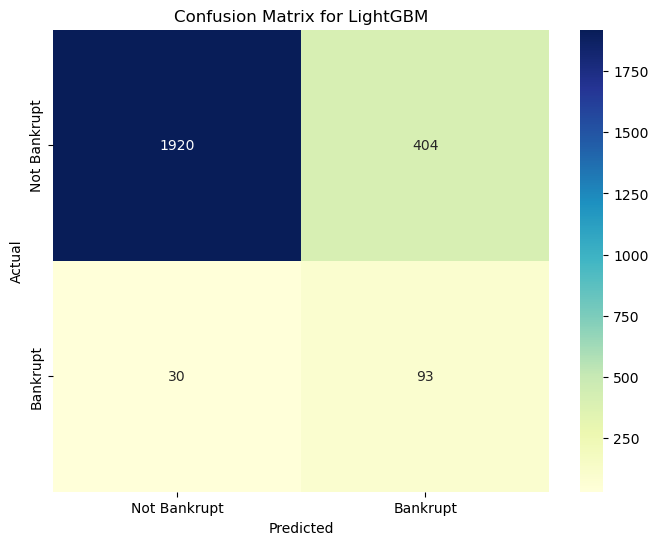

In [21]:
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
import math
from joblib import Parallel, delayed

# Load the data
data = final_data_with_selected_features.copy()

X = data.drop(['Bankrupt?'], axis=1)
y = data['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and parameter grids
models_and_params2 = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    "Extra Trees": {
        "model": ExtraTreesClassifier(random_state=42),
        "params": {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "params": {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'min_child_weight': [1, 3]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42, verbose=-1),
        "params": {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'num_leaves': [31, 40],
            'min_child_samples': [10, 20]
        }
    }
}

results2 = []
n_iterations = 100

def evaluate_model(name, mp):
    base_model = mp['model']
    param_grid = mp['params']
    
    best_score = -np.inf
    best_params = None
    best_predictions = None
    best_model = None
    best_cv_score = -np.inf

    for params in ParameterGrid(param_grid):
        base_model.set_params(**params)

        predictions = np.zeros((X_test.shape[0], n_iterations))
        cv_scores = []

        for i in range(n_iterations):
            bankrupt_samples = X_train[y_train == 1]
            non_bankrupt_samples = X_train[y_train == 0].sample(n=len(bankrupt_samples), random_state=i)
            
            X_resampled = pd.concat([bankrupt_samples, non_bankrupt_samples])
            y_resampled = y_train.loc[X_resampled.index]
            
            base_model.fit(X_resampled, y_resampled)
            predictions[:, i] = base_model.predict(X_test)

            cv_score = np.mean(cross_val_score(base_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1))
            cv_scores.append(cv_score)

        # Perform voting for final prediction
        final_predictions = [Counter(predictions[i, :]).most_common(1)[0][0] for i in range(X_test.shape[0])]

        accuracy = accuracy_score(y_test, final_predictions)
        mean_cv_score = np.mean(cv_scores)

        if accuracy > best_score:
            best_score = accuracy
            best_params = params
            best_predictions = final_predictions
            best_model = base_model
            best_cv_score = mean_cv_score

    class_report = classification_report(y_test, best_predictions, output_dict=True)
    conf_matrix = confusion_matrix(y_test, best_predictions)
    
    return {
        "Model": name,
        "Best Parameters": best_params,
        "Accuracy": best_score,
        "Best Cross-Validation Score": best_cv_score,
        "Classification Report": class_report,
        "Confusion Matrix": conf_matrix,
        "Best Model": best_model
    }

results2 = Parallel(n_jobs=-1)(delayed(evaluate_model)(name, mp) for name, mp in models_and_params2.items())

for result in results2:
    name = result["Model"]
    best_model = result["Best Model"]
    
    print(f"Model: {name}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Best Cross-Validation Score: {result['Best Cross-Validation Score']:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, result["Best Model"].predict(X_test)))
    print("Confusion Matrix:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Not Bankrupt", "Bankrupt"], yticklabels=["Not Bankrupt", "Bankrupt"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()